In [1]:
#setup

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import cv2


11490434/11490434 [==============================] - 0s 0us/step


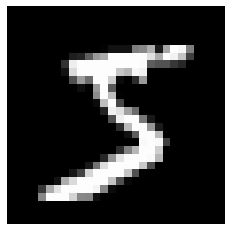

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
#data preparation

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#show 
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(x_train[0], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
# Build the model

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [5]:
#training

batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 37s 85ms/step - loss: 0.3596 - accuracy: 0.8911 - val_loss: 0.0799 - val_accuracy: 0.9802
Epoch 2/15
422/422 [==============================] - 33s 79ms/step - loss: 0.1114 - accuracy: 0.9657 - val_loss: 0.0534 - val_accuracy: 0.9852
Epoch 3/15
422/422 [==============================] - 32s 76ms/step - loss: 0.0820 - accuracy: 0.9745 - val_loss: 0.0468 - val_accuracy: 0.9880
Epoch 4/15
422/422 [==============================] - 33s 79ms/step - loss: 0.0670 - accuracy: 0.9789 - val_loss: 0.0396 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 35s 83ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.0392 - val_accuracy: 0.9880
Epoch 6/15
422/422 [==============================] - 35s 82ms/step - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0346 - val_accuracy: 0.9913
Epoch 7/15
422/422 [==============================] - 34s 82ms/step - loss: 0.0513 - accuracy: 0.9844 - val_loss: 0.0379 - val_accuracy:

In [ ]:
# evaluation

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
